In [1]:
import sys
sys.path.append("./../")
import matplotlib.pyplot as plt
from sklearn.datasets import make_spd_matrix
import numpy as np
import zeus

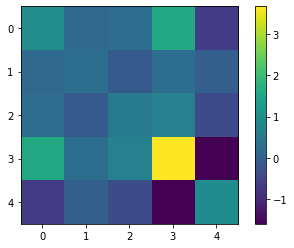

In [2]:
ndim = 5
nwalkers = 2*ndim
nsteps= 1000

C = make_spd_matrix(ndim)
plt.imshow(C)
plt.colorbar()

icov = np.linalg.inv(C)

mu = np.random.rand(ndim) * 100.0

def logp(x, mu, icov):
    return -0.5 * np.dot(np.dot((x-mu).T,icov),(x-mu))

start = np.random.rand(ndim)

In [3]:
sampler = zeus.sampler(logp, nwalkers, ndim, args=[mu, icov])
sampler.run(start, nsteps)

100%|██████████| 1000/1000 [00:00<00:00, 2523.04it/s]


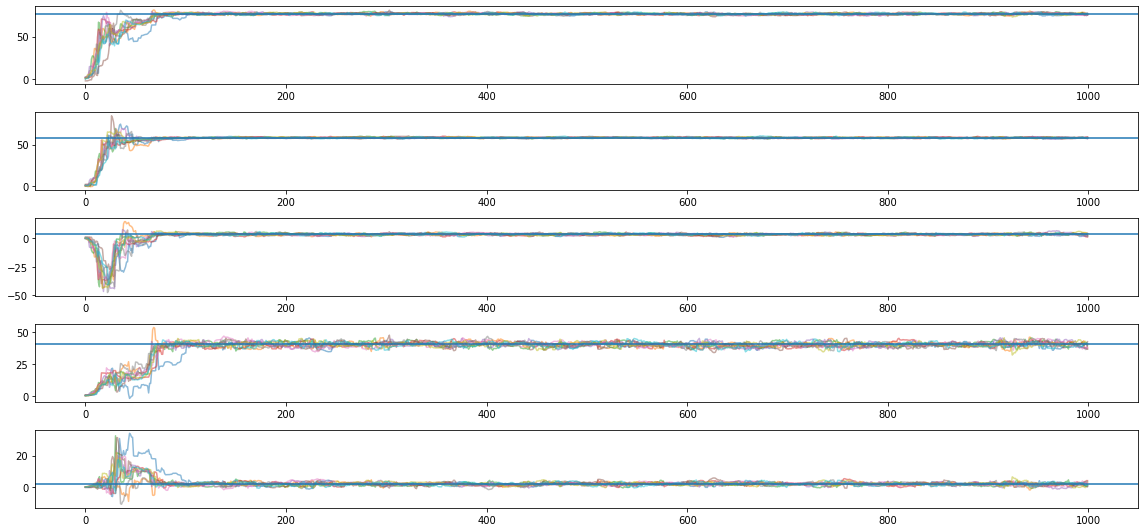

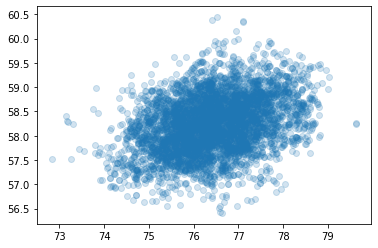

MCMC mean: [76.42059958 58.23477058  3.44584266 40.22576828  2.02241776]
TRUE mean: [76.55189799 58.25670666  3.45133364 40.41218392  1.93152283]
MCMC std: [0.94542443 0.57093557 0.7089504  1.82506391 0.93938436]
TRUE std: [0.99484609 0.56029866 0.73980441 1.91576487 0.97480411]
act: 10.771197528774191
ESS: 928.4018766981096
ESS/LE: 0.02791598390408364


In [4]:
plt.figure(figsize=(16,1.5*ndim))
for n in range(ndim):
    plt.subplot2grid((ndim, 1), (n, 0))
    plt.plot(np.arange(np.shape(sampler.chain)[1]),sampler.chain[:,:,n].T,alpha=0.5)
    plt.axhline(y=mu[n])
plt.tight_layout()
plt.show()

trace = sampler.flatten()
plt.scatter(trace[:,0],trace[:,1], alpha=0.2)
plt.show()
print('MCMC mean:', np.mean(trace, axis=0))
print('TRUE mean:', mu)
print('MCMC std:', np.std(trace, axis=0))
print('TRUE std:', np.sqrt(np.diag(C)))


act_mean_minas = 0.0
for i in range(ndim):
    act_mean_minas += zeus.autocorrtime(trace[:,i]) 
act_mean_minas /= ndim
print('act:', act_mean_minas)
print('ESS:', nwalkers * nsteps / act_mean_minas)
print('ESS/LE:', (nwalkers * nsteps / act_mean_minas)/sampler.nlogp)